In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Run this cell first in your fresh runtime
#!pip install --upgrade scikit-learn
#!pip install --upgrade imbalanced-learn
!pip install catboost
!pip install smote_variants


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the column names based on the dataset documentation
column_names = [
    'existing_checking_account', 'duration_months', 'credit_history', 'purpose',
    'credit_amount', 'savings_account_bonds', 'present_employment_since',
    'installment_rate_percentage', 'personal_status_sex', 'other_debtors_guarantors',
    'present_residence_since', 'property', 'age_years', 'other_installment_plans',
    'housing', 'number_existing_credits', 'job', 'number_people_liable',
    'telephone', 'foreign_worker', 'credit_risk'
]

df = pd.read_csv('/content/drive/MyDrive/Diss Dataset/german.data.txt', sep=" ", header=None, names=column_names)
print(df.head())
print(df.info())

  existing_checking_account  duration_months credit_history purpose  \
0                       A11                6            A34     A43   
1                       A12               48            A32     A43   
2                       A14               12            A34     A46   
3                       A11               42            A32     A42   
4                       A11               24            A33     A40   

   credit_amount savings_account_bonds present_employment_since  \
0           1169                   A65                      A75   
1           5951                   A61                      A73   
2           2096                   A61                      A74   
3           7882                   A61                      A74   
4           4870                   A61                      A73   

   installment_rate_percentage personal_status_sex other_debtors_guarantors  \
0                            4                 A93                     A101   
1           

In [ ]:
# Define the mapping dictionaries from the documentation

# [cite_start]Attribute 1: Status of existing checking account [cite: 3]
status_map = {
    'A11': '< 0 DM',
    'A12': '0 <= ... < 200 DM',
    'A13': '>= 200 DM',
    'A14': 'no checking account'
}

# [cite_start]Attribute 3: Credit history [cite: 4]
history_map = {
    'A30': 'no credits/all paid',
    'A31': 'all credits at this bank paid',
    'A32': 'existing credits paid till now',
    'A33': 'delay in paying off in the past',
    'A34': 'critical account/other credits'
}

# [cite_start]Attribute 4: Purpose [cite: 5]
purpose_map = {
    'A40': 'car (new)', 'A41': 'car (used)',
    'A42': 'furniture/equipment', 'A43': 'radio/television',
    'A44': 'domestic appliances', 'A45': 'repairs',
    'A46': 'education', 'A47': 'vacation',
    'A48': 'retraining', 'A49': 'business', 'A410': 'others'
}

# [cite_start]Attribute 6: Savings account/bonds [cite: 6]
savings_map = {
    'A61': '< 100 DM', 'A62': '100 <= ... < 500 DM',
    'A63': '500 <= ... < 1000 DM', 'A64': '>= 1000 DM',
    'A65': 'unknown/no savings account'
}

# [cite_start]Attribute 7: Present employment since [cite: 7]
employment_map = {
    'A71': 'unemployed', 'A72': '< 1 year',
    'A73': '1 <= ... < 4 years', 'A74': '4 <= ... < 7 years',
    'A75': '>= 7 years'
}

# [cite_start]Attribute 9: Personal status and sex [cite: 8]
personal_status_map = {
    'A91': 'male : divorced/separated',
    'A92': 'female : divorced/separated/married',
    'A93': 'male : single', 'A94': 'male : married/widowed',
    'A95': 'female : single'
}

# Attribute 10: Other debtors / guarantors
debtors_map = {'A101': 'none', 'A102': 'co-applicant', 'A103': 'guarantor'}

# [cite_start]Attribute 12: Property [cite: 9]
property_map = {
    'A121': 'real estate',
    'A122': 'building society savings agreement/life insurance',
    'A123': 'car or other',
    'A124': 'unknown / no property'
}

# [cite_start]Attribute 14: Other installment plans [cite: 10]
installment_plans_map = {'A141': 'bank', 'A142': 'stores', 'A143': 'none'}

# Attribute 15: Housing
housing_map = {'A151': 'rent', 'A152': 'own', 'A153': 'for free'}

# [cite_start]Attribute 17: Job [cite: 11]
job_map = {
    'A171': 'unemployed/unskilled-non-resident',
    'A172': 'unskilled-resident',
    'A173': 'skilled employee/official',
    'A174': 'management/self-employed/highly qualified employee/officer'
}

# Attribute 19: Telephone
telephone_map = {'A191': 'none', 'A192': 'yes'}

# [cite_start]Attribute 20: foreign worker [cite: 12]
foreign_worker_map = {'A201': 'yes', 'A202': 'no'}


# Apply the mappings to the respective columns
df['existing_checking_account'] = df['existing_checking_account'].map(status_map)
df['credit_history'] = df['credit_history'].map(history_map)
df['purpose'] = df['purpose'].map(purpose_map)
df['savings_account_bonds'] = df['savings_account_bonds'].map(savings_map)
df['present_employment_since'] = df['present_employment_since'].map(employment_map)
df['personal_status_sex'] = df['personal_status_sex'].map(personal_status_map)
df['other_debtors_guarantors'] = df['other_debtors_guarantors'].map(debtors_map)
df['property'] = df['property'].map(property_map)
df['other_installment_plans'] = df['other_installment_plans'].map(installment_plans_map)
df['housing'] = df['housing'].map(housing_map)
df['job'] = df['job'].map(job_map)
df['telephone'] = df['telephone'].map(telephone_map)
df['foreign_worker'] = df['foreign_worker'].map(foreign_worker_map)

# Display the first few rows to confirm the changes
print("DataFrame after mapping categorical variables:")
display(df.head())

DataFrame after mapping categorical variables:


,existing_checking_account,duration_months,credit_history,purpose,credit_amount,savings_account_bonds,present_employment_since,installment_rate_percentage,personal_status_sex,other_debtors_guarantors,...,property,age_years,other_installment_plans,housing,number_existing_credits,job,number_people_liable,telephone,foreign_worker,credit_risk
0,< 0 DM,6,critical account/other credits,radio/television,1169,unknown/no savings account,>= 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee/official,1,yes,yes,1
1,0 <= ... < 200 DM,48,existing credits paid till now,radio/television,5951,< 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee/official,1,none,yes,2
2,no checking account,12,critical account/other credits,education,2096,< 100 DM,4 <= ... < 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled-resident,2,none,yes,1
3,< 0 DM,42,existing credits paid till now,furniture/equipment,7882,< 100 DM,4 <= ... < 7 years,2,male : single,guarantor,...,building society savings agreement/life insurance,45,none,for free,1,skilled employee/official,2,none,yes,1
4,< 0 DM,24,delay in paying off in the past,car (new),4870,< 100 DM,1 <= ... < 4 years,3,male : single,none,...,unknown / no property,53,none,for free,2,skilled employee/official,2,none,yes,2


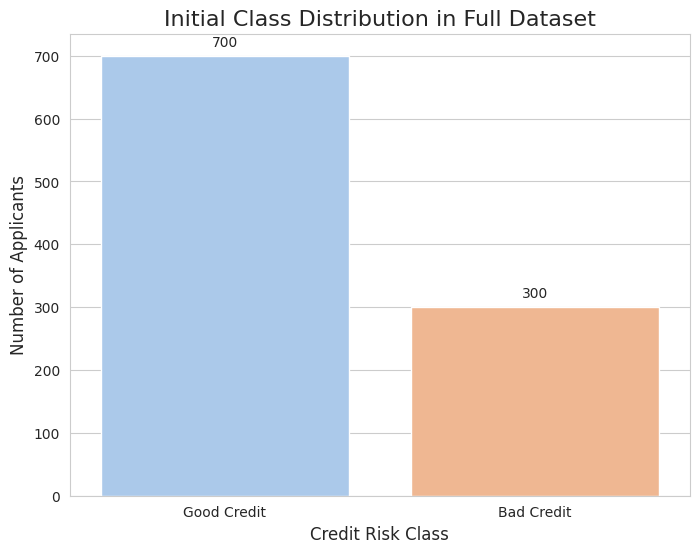

In [ ]:
import seaborn as sns


# This assumes 'df' is your DataFrame immediately after loading.

# --- FIX 1: The class_labels dictionary now matches the raw data (1 and 2) ---
class_labels = {1: 'Good Credit', 2: 'Bad Credit'}
class_counts = df['credit_risk'].value_counts()


# Create the plot
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

# --- FIX 2: Updated barplot command to resolve the FutureWarning ---
barplot = sns.barplot(x=class_counts.index, y=class_counts.values,
                      hue=class_counts.index, palette="pastel", legend=False)

# Add titles and labels
plt.title('Initial Class Distribution in Full Dataset', fontsize=16)
plt.xlabel('Credit Risk Class', fontsize=12)
plt.ylabel('Number of Applicants', fontsize=12)
plt.xticks(ticks=[0, 1], labels=[class_labels[i] for i in class_counts.index.sort_values()])

# Add count labels on top of the bars for clarity
for index, value in enumerate(class_counts.sort_index().values):
    plt.text(index, value + 10, str(value), ha='center', va='bottom')

# Display the chart
plt.show()

In [ ]:
# Check for missing values in each column
print("--- Missing Values ---")
print(df.isnull().sum())
print("\n" + "-"*30 + "\n")


# Get a statistical summary of the numerical columns
print("--- Numerical Feature Distribution ---")
display(df.describe())

--- Missing Values ---
existing_checking_account      0
duration_months                0
credit_history                 0
purpose                        0
credit_amount                  0
savings_account_bonds          0
present_employment_since       0
installment_rate_percentage    0
personal_status_sex            0
other_debtors_guarantors       0
present_residence_since        0
property                       0
age_years                      0
other_installment_plans        0
housing                        0
number_existing_credits        0
job                            0
number_people_liable           0
telephone                      0
foreign_worker                 0
credit_risk                    0
dtype: int64

------------------------------

--- Numerical Feature Distribution ---


,duration_months,credit_amount,installment_rate_percentage,present_residence_since,age_years,number_existing_credits,number_people_liable,credit_risk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


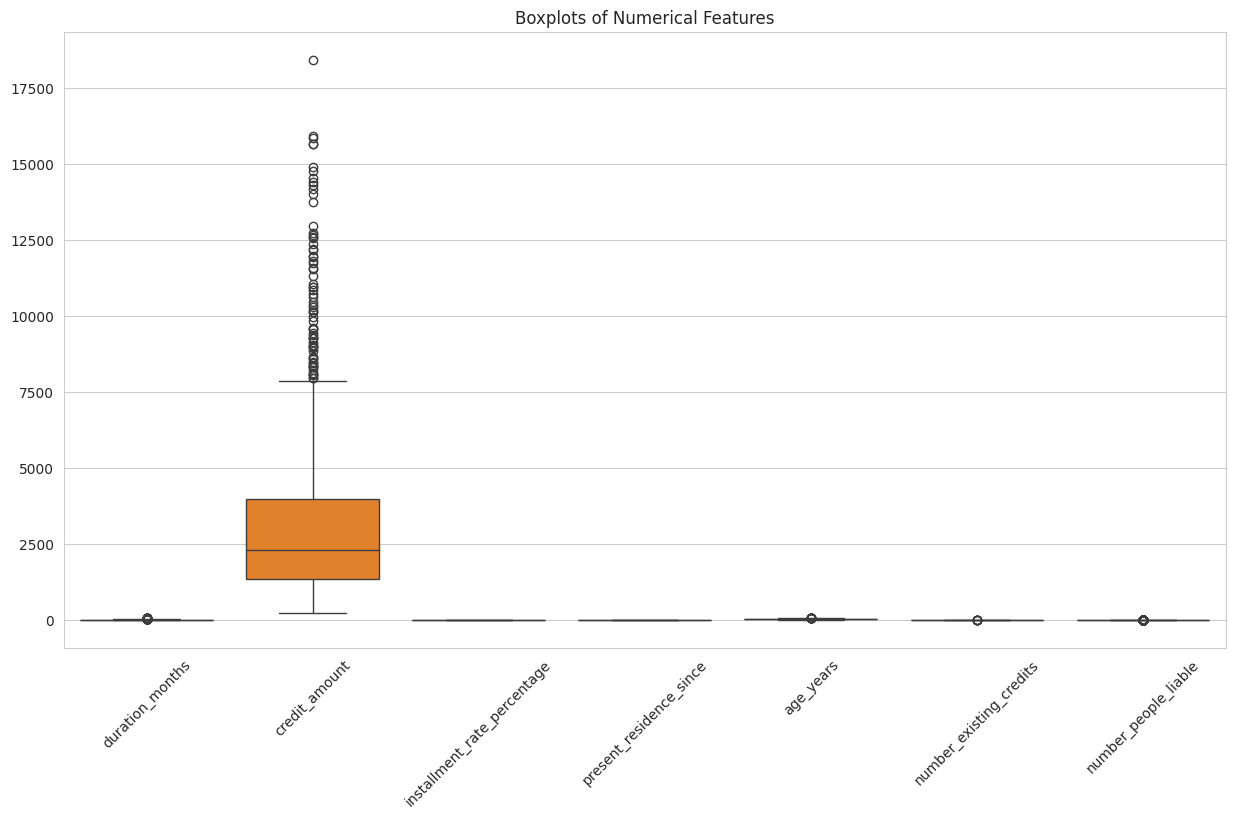

In [ ]:
# Get numerical column names (we'll exclude the original target column for this)
numerical_cols = df.select_dtypes(include=np.number).columns
# Let's remap the target variable now as it's part of our cleaning process
# 1 (good) -> 0 and 2 (bad) -> 1
df['credit_risk'] = df['credit_risk'].map({1: 0, 2: 1})

# Let's focus on the actual features for outlier detection
feature_cols = numerical_cols.drop('credit_risk')

# Create boxplots for each numerical feature
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[feature_cols])
plt.title('Boxplots of Numerical Features')
plt.xticks(rotation=45)
plt.show()

In [ ]:
print("--- Capping Outliers using IQR method ---\n")

# Corrected list of columns to cap
cols_to_cap = [
    'duration_months',
    'credit_amount',
    'age_years',
    'number_existing_credits'  # Note: 'number_people_liable' has been removed
]

for col in cols_to_cap:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()

    if outliers_count > 0:
        print(f"Feature '{col}': Found {outliers_count} outliers.")

        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        print(f"Capped outliers in '{col}'. New max: {df[col].max():.2f}, New min: {df[col].min():.2f}\n")
    else:
        print(f"Feature '{col}': No outliers found within the IQR range.\n")


print("Outlier treatment complete.")

--- Capping Outliers using IQR method ---

Feature 'duration_months': Found 70 outliers.
Capped outliers in 'duration_months'. New max: 42.00, New min: 4.00

Feature 'credit_amount': Found 72 outliers.
Capped outliers in 'credit_amount'. New max: 7882.38, New min: 250.00

Feature 'age_years': Found 23 outliers.
Capped outliers in 'age_years'. New max: 64.50, New min: 19.00

Feature 'number_existing_credits': Found 6 outliers.
Capped outliers in 'number_existing_credits'. New max: 3.50, New min: 1.00

Outlier treatment complete.


--- Correlation with Target Variable (credit_risk) ---
credit_risk                    1.000000
duration_months                0.213059
credit_amount                  0.128539
installment_rate_percentage    0.072404
present_residence_since        0.002967
number_people_liable          -0.003015
number_existing_credits       -0.047115
age_years                     -0.091812
Name: credit_risk, dtype: float64


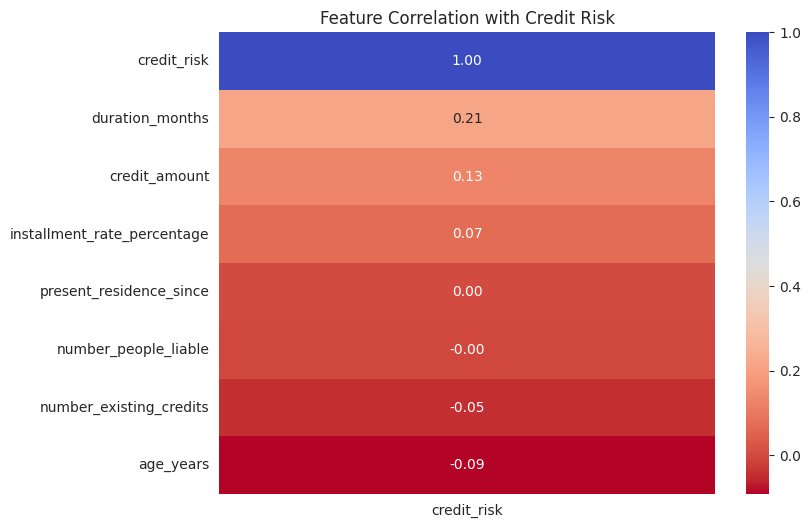

In [ ]:
# Calculate the correlation matrix for all numerical features
corr_matrix = df.corr(numeric_only=True)

# Isolate the correlations with the target variable 'credit_risk'
target_corr = corr_matrix['credit_risk'].sort_values(ascending=False)

# Display the correlations
print("--- Correlation with Target Variable (credit_risk) ---")
print(target_corr)

# Visualize these correlations in a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(target_corr.to_frame(), annot=True, cmap='coolwarm_r', fmt=".2f")
plt.title('Feature Correlation with Credit Risk')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('credit_risk', axis=1)
y = df['credit_risk']

# Split into training and testing sets (80/20 split)
# stratify=y ensures both sets have the same proportion of risky/safe credits
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (800, 20)
Test set shape: (200, 20)


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Identify numerical and categorical column names from the training data
numerical_features = X_train.select_dtypes(include=np.number).columns
categorical_features = X_train.select_dtypes(include='object').columns

# Create the preprocessor object
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features)
    ]
)

# Fit the preprocessor on the training data and transform both sets
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("\nShape of processed training data:", X_train_processed.shape)
print("Shape of processed test data:", X_test_processed.shape)


Shape of processed training data: (800, 48)
Shape of processed test data: (200, 48)


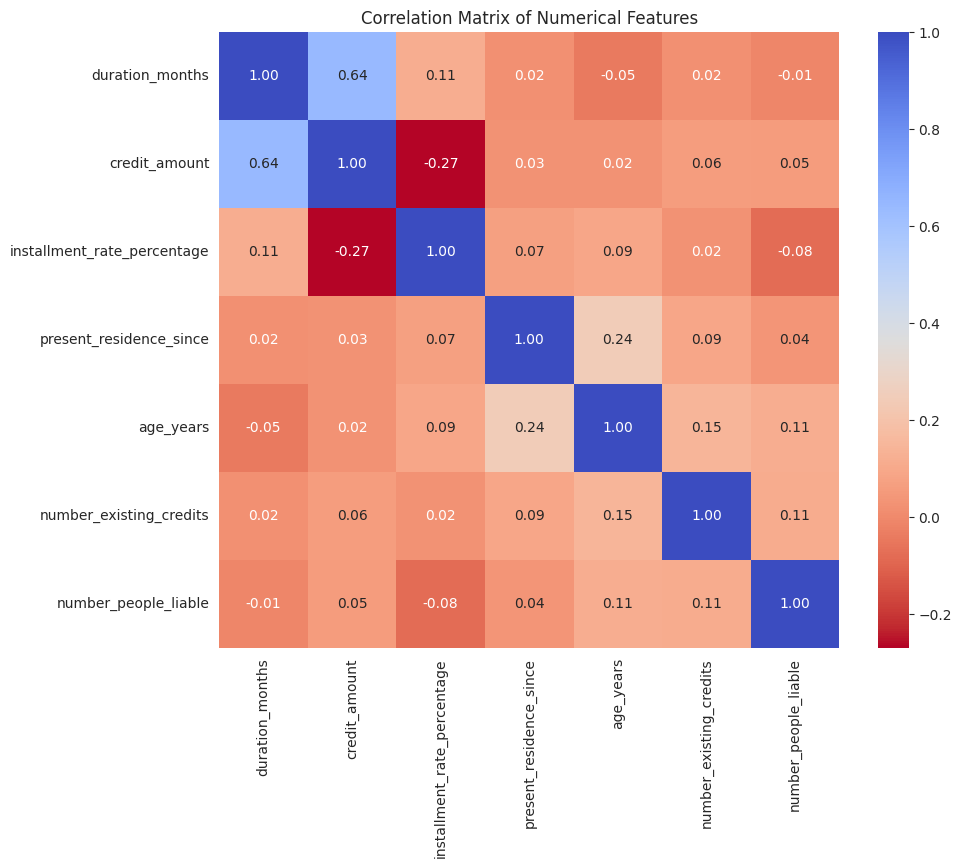

In [ ]:
# Calculate correlation on the original numerical features of the training set
corr_matrix = X_train[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm_r')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Get the feature names from the preprocessor
# This gives us the correct names after one-hot encoding
feature_names = preprocessor.get_feature_names_out()

# Convert the processed training data back to a dense DataFrame
X_train_processed_df = pd.DataFrame(X_train_processed, columns=feature_names)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_processed_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_processed_df.values, i) for i in range(X_train_processed_df.shape[1])]

print("--- VIF Results (showing features with VIF > 10) ---")
# Display features with a VIF above 10, sorted
display(vif_data[vif_data['VIF'] > 10].sort_values('VIF', ascending=False))

--- VIF Results (showing features with VIF > 10) ---


,feature,VIF
47,cat__foreign_worker_yes,23.898596
35,cat__other_debtors_guarantors_none,20.025214
41,cat__housing_own,17.029140
12,cat__credit_history_existing credits paid till...,11.803643


In [ ]:
from sklearn.linear_model import LassoCV

# 1. Initialize the LassoCV model
lasso = LassoCV(cv=5, random_state=42, max_iter=10000)

# 2. Fit the model on the processed training data
print("--- Fitting LassoCV to select features... ---")
lasso.fit(X_train_processed, y_train)
print("LassoCV fitting complete.")


# Get the absolute value of the model's coefficients
importance = np.abs(lasso.coef_)

# Get the names of all features from the preprocessor
feature_names = preprocessor.get_feature_names_out()

# Create a mask to identify features where the coefficient is not zero
selected_features_mask = importance > 0
selected_feature_names = feature_names[selected_features_mask]

print(f"\nTotal features originally: {X_train_processed.shape[1]}")
print(f"Features selected by Lasso: {len(selected_feature_names)}")

# --- Create new datasets with selected features ---
X_train_selected = X_train_processed[:, selected_features_mask]
X_test_selected = X_test_processed[:, selected_features_mask]

print(f"\nShape of new training data: {X_train_selected.shape}")
print(f"Shape of new test data: {X_test_selected.shape}")

# --- This is the part that creates the table ---
print("\n--- Table of Features Selected by LassoCV ---")

# Create a pandas DataFrame from the list of selected feature names
selected_features_df = pd.DataFrame(selected_feature_names, columns=['Feature Name'])

# Clean up the feature names for the dissertation
selected_features_df['Feature Name'] = selected_features_df['Feature Name'].str.replace('num__', '').str.replace('cat__', '')

# Display the final table
display(selected_features_df)

--- Fitting LassoCV to select features... ---
LassoCV fitting complete.

Total features originally: 48
Features selected by Lasso: 30

Shape of new training data: (800, 30)
Shape of new test data: (200, 30)

--- Table of Features Selected by LassoCV ---


,Feature Name
0,duration_months
1,credit_amount
2,installment_rate_percentage
3,age_years
4,number_existing_credits
5,number_people_liable
6,existing_checking_account_< 0 DM
7,existing_checking_account_>= 200 DM
8,existing_checking_account_no checking account
9,credit_history_critical account/other credits


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_2['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

Class distribution before SMOTE:
credit_risk
0    560
1    240
Name: count, dtype: int64

Class distribution after SMOTE:
credit_risk
1    560
0    560
Name: count, dtype: int64


/tmp/ipython-input-3369265453.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=before_smote_counts.index, y=before_smote_counts.values, ax=axes[0], palette="pastel")
/tmp/ipython-input-3369265453.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Good Credit (0)', 'Bad Credit (1)'])
/tmp/ipython-input-3369265453.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=after_smote_counts.index, y=after_smote_counts.values, ax=axes[1], palette="pastel")
/tmp/ipython-input-3369265453.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. afte

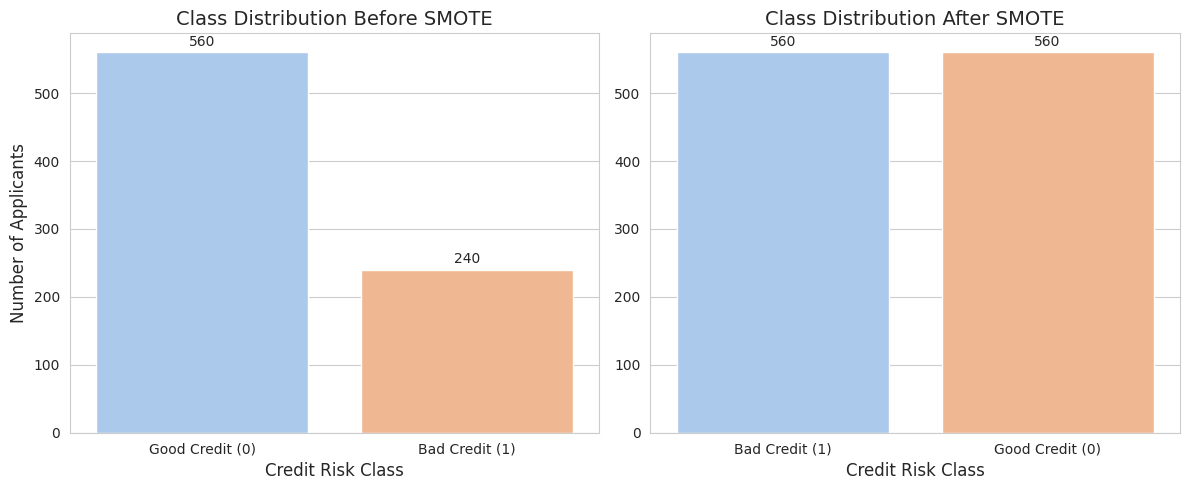

In [ ]:
from imblearn.over_sampling import SMOTE

# --- 1. Perform SMOTE Balancing ---

# Initialize SMOTE for reproducibility
smote = SMOTE(random_state=42)

# Store class distribution before SMOTE
before_smote_counts = pd.Series(y_train).value_counts()
print("Class distribution before SMOTE:")
print(before_smote_counts)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train_selected, y_train)

# Store class distribution after SMOTE
after_smote_counts = pd.Series(y_train_smote).value_counts()
print("\nClass distribution after SMOTE:")
print(after_smote_counts)


# --- 2. Create Bar Graphs for Visualization ---

# Set up the figure and axes for two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.set_style("whitegrid")

# --- Plot 1: Before SMOTE ---
sns.barplot(x=before_smote_counts.index, y=before_smote_counts.values, ax=axes[0], palette="pastel")
axes[0].set_title('Class Distribution Before SMOTE', fontsize=14)
axes[0].set_xlabel('Credit Risk Class', fontsize=12)
axes[0].set_ylabel('Number of Applicants', fontsize=12)
axes[0].set_xticklabels(['Good Credit (0)', 'Bad Credit (1)'])
# Add count labels on top of bars
for index, value in enumerate(before_smote_counts.values):
    axes[0].text(index, value + 5, str(value), ha='center', va='bottom')


# --- Plot 2: After SMOTE ---
sns.barplot(x=after_smote_counts.index, y=after_smote_counts.values, ax=axes[1], palette="pastel")
axes[1].set_title('Class Distribution After SMOTE', fontsize=14)
axes[1].set_xlabel('Credit Risk Class', fontsize=12)
axes[1].set_ylabel('') # Hide y-label for the second plot for a cleaner look
axes[1].set_xticklabels(['Bad Credit (1)', 'Good Credit (0)'])
# Add count labels on top of bars
for index, value in enumerate(after_smote_counts.values):
    axes[1].text(index, value + 5, str(value), ha='center', va='bottom')

# Display the plots
plt.tight_layout()
plt.show()

In [ ]:
import statsmodels.api as sm


print("\n## Fitting the Statsmodels Logistic Regression Model ##")

# 1. Convert the feature-selected training data to a pandas DataFrame
#    This is necessary to assign the correct column names for the summary.
X_train_df = pd.DataFrame(X_train_selected, columns=selected_feature_names)

# 2. Add a constant (intercept) to the features
#    The statsmodels Logit function does not add an intercept by default.
X_train_const = sm.add_constant(X_train_df)

# 3. Fit the Logistic Regression model
#    Note: We use the original, imbalanced y_train for this statistical baseline.
#    We reset the index of y_train to align it with X_train_const.
logit_model = sm.Logit(y_train.reset_index(drop=True), X_train_const)
result = logit_model.fit()

# 4. Print the detailed statistical summary
#    This summary includes coefficients, p-values, and confidence intervals.
print("\n--- Statsmodels Logit Results Summary ---")
print(result.summary())



## Fitting the Statsmodels Logistic Regression Model ##
Optimization terminated successfully.
         Current function value: 0.453077
         Iterations 7

--- Statsmodels Logit Results Summary ---
                           Logit Regression Results                           
Dep. Variable:            credit_risk   No. Observations:                  800
Model:                          Logit   Df Residuals:                      769
Method:                           MLE   Df Model:                           30
Date:                Tue, 26 Aug 2025   Pseudo R-squ.:                  0.2583
Time:                        18:18:30   Log-Likelihood:                -362.46
converged:                       True   LL-Null:                       -488.69
Covariance Type:            nonrobust   LLR p-value:                 5.076e-37
                                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------

In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier # Import the MLP Classifier
import warnings


# Suppress warnings
warnings.filterwarnings('ignore', category=UserWarning)

# Define the models to train, without ELM
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0),
    'MLP Neural Network': MLPClassifier(random_state=42, max_iter=1000) # Added MLP
}

# Set up the cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = {}

# Loop through each model to perform cross-validation
print("--- Running 5-Fold Cross-Validation with SMOTE ---")
for name, model in models.items():
    pipeline = ImbPipeline(steps=[
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])
    scores = cross_val_score(pipeline, X_train_selected, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
    results[name] = scores
    print(f"{name}: Mean AUC = {np.mean(scores):.4f} (Std = {np.std(scores):.4f})")

--- Running 5-Fold Cross-Validation with SMOTE ---
Logistic Regression: Mean AUC = 0.7901 (Std = 0.0618)
Random Forest: Mean AUC = 0.7939 (Std = 0.0368)
XGBoost: Mean AUC = 0.7754 (Std = 0.0507)
CatBoost: Mean AUC = 0.8014 (Std = 0.0387)
MLP Neural Network: Mean AUC = 0.7592 (Std = 0.0411)


In [ ]:
from sklearn.model_selection import GridSearchCV

# --- Example: Tuning the Random Forest Model ---

# 1. Create the imblearn pipeline
# We are tuning the 'classifier' step of this pipeline
rf_pipeline = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# 2. Define the hyperparameter grid to search
# Note the 'classifier__' prefix for each parameter name
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [5, 10, None],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__criterion': ['gini', 'entropy']
}

# 3. Set up GridSearchCV
# The 'cv' and 'scoring' parameters are the same as before
grid_search = GridSearchCV(estimator=rf_pipeline,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=cv,
                           n_jobs=-1,
                           verbose=1)

# 4. Run the grid search on the training data
print("--- Tuning Random Forest ---")
grid_search.fit(X_train_selected, y_train)

# 5. Print the best results
print(f"\nBest cross-validated AUC: {grid_search.best_score_:.4f}")
print("Best hyperparameters found:")
print(grid_search.best_params_)

# You can save the best model for the final evaluation
best_rf_model = grid_search.best_estimator_

--- Tuning Random Forest ---
Fitting 5 folds for each of 54 candidates, totalling 270 fits

Best cross-validated AUC: 0.8044
Best hyperparameters found:
{'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__n_estimators': 200}


In [ ]:
# --- Tuning the XGBoost Model ---

# 1. Create the imblearn pipeline
xgb_pipeline = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False))
])

# 2. Define the hyperparameter grid
# A smaller grid to keep tuning time reasonable
param_grid_xgb = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.05, 0.1],
    'classifier__subsample': [0.7, 1.0]
}

# 3. Set up GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_pipeline,
                               param_grid=param_grid_xgb,
                               scoring='roc_auc',
                               cv=cv,
                               n_jobs=-1,
                               verbose=1)

# 4. Run the grid search
print("--- Tuning XGBoost ---")
grid_search_xgb.fit(X_train_selected, y_train)

# 5. Print the best results
print(f"\nBest cross-validated AUC for XGBoost: {grid_search_xgb.best_score_:.4f}")
print("Best hyperparameters found:")
print(grid_search_xgb.best_params_)

# Save the best model
best_xgb_model = grid_search_xgb.best_estimator_

--- Tuning XGBoost ---
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Best cross-validated AUC for XGBoost: 0.8001
Best hyperparameters found:
{'classifier__learning_rate': 0.05, 'classifier__max_depth': 3, 'classifier__n_estimators': 200, 'classifier__subsample': 0.7}


In [ ]:
# --- Tuning the CatBoost Model ---

# 1. Create the imblearn pipeline
cat_pipeline = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('classifier', CatBoostClassifier(random_state=42, verbose=0))
])

# 2. Define the hyperparameter grid
param_grid_cat = {
    'classifier__iterations': [200, 500],
    'classifier__depth': [4, 6],
    'classifier__learning_rate': [0.05, 0.1],
    'classifier__l2_leaf_reg': [1, 3, 5] # L2 regularization
}

# 3. Set up GridSearchCV
grid_search_cat = GridSearchCV(estimator=cat_pipeline,
                               param_grid=param_grid_cat,
                               scoring='roc_auc',
                               cv=cv,
                               n_jobs=-1,
                               verbose=1)

# 4. Run the grid search
print("\n--- Tuning CatBoost ---")
grid_search_cat.fit(X_train_selected, y_train)

# 5. Print the best results
print(f"\nBest cross-validated AUC for CatBoost: {grid_search_cat.best_score_:.4f}")
print("Best hyperparameters found:")
print(grid_search_cat.best_params_)

# Save the best model
best_cat_model = grid_search_cat.best_estimator_


--- Tuning CatBoost ---
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Best cross-validated AUC for CatBoost: 0.8035
Best hyperparameters found:
{'classifier__depth': 4, 'classifier__iterations': 200, 'classifier__l2_leaf_reg': 1, 'classifier__learning_rate': 0.05}


In [ ]:
# --- Tuning the MLP Neural Network ---

# 1. Create the imblearn pipeline
mlp_pipeline = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('classifier', MLPClassifier(random_state=42, max_iter=1000))
])

# 2. Define the hyperparameter grid
# We'll test different network structures, activation functions, and regularization strengths.
param_grid_mlp = {
    'classifier__hidden_layer_sizes': [(50,), (100,), (50, 25)],
    'classifier__activation': ['tanh', 'relu'],
    'classifier__alpha': [0.0001, 0.001, 0.01], # L2 regularization
    'classifier__learning_rate': ['constant', 'adaptive']
}

# 3. Set up and run GridSearchCV
grid_search_mlp = GridSearchCV(estimator=mlp_pipeline,
                               param_grid=param_grid_mlp,
                               scoring='roc_auc',
                               cv=cv,
                               n_jobs=-1,
                               verbose=1)

print("\n--- Tuning MLP Neural Network ---")
grid_search_mlp.fit(X_train_selected, y_train)

# 4. Print the best results
print(f"\nBest cross-validated AUC for MLP: {grid_search_mlp.best_score_:.4f}")
print("Best hyperparameters found:")
print(grid_search_mlp.best_params_)

# 5. Save the best tuned model
best_mlp_model = grid_search_mlp.best_estimator_


--- Tuning MLP Neural Network ---
Fitting 5 folds for each of 36 candidates, totalling 180 fits

Best cross-validated AUC for MLP: 0.7600
Best hyperparameters found:
{'classifier__activation': 'relu', 'classifier__alpha': 0.01, 'classifier__hidden_layer_sizes': (100,), 'classifier__learning_rate': 'constant'}


In [ ]:
# --- Tuning the Logistic Regression using a Pipeline ---

# 1. Create the imblearn pipeline for Logistic Regression
log_reg_pipeline = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=42)), # This will now work correctly
    ('classifier', LogisticRegression(solver='saga', max_iter=2000, random_state=42))
])

# 2. Define the hyperparameter grid (using the 'classifier__' prefix)
param_grid_lr = {
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': np.logspace(-3, 3, 7)
}

# 3. Set up and run GridSearchCV
grid_search_lr = GridSearchCV(
    estimator=log_reg_pipeline,
    param_grid=param_grid_lr,
    scoring='roc_auc',
    cv=5, # or your predefined cv object
    n_jobs=-1
)

# 4. Fit on the ORIGINAL, IMBALANCED training data
# The pipeline handles the SMOTE internally and correctly
print("\n--- Tuning Logistic Regression with Pipeline ---")

# Make sure X_train_selected and y_train are defined from your previous steps
grid_search_lr.fit(X_train_selected, y_train)

# 5. Get and save the best tuned model
print(f"Best cross-validated AUC for Logistic Regression: {grid_search_lr.best_score_:.4f}")
print("Best hyperparameters found:", grid_search_lr.best_params_)
best_lr_model = grid_search_lr.best_estimator_


--- Tuning Logistic Regression with Pipeline ---
Best cross-validated AUC for Logistic Regression: 0.7945
Best hyperparameters found: {'classifier__C': np.float64(0.1), 'classifier__penalty': 'l2'}


--- Final Random Forest Performance on Hold-Out Test Set ---
              precision    recall  f1-score   support

 Good Credit       0.79      0.82      0.81       140
  Bad Credit       0.55      0.50      0.52        60

    accuracy                           0.72       200
   macro avg       0.67      0.66      0.66       200
weighted avg       0.72      0.72      0.72       200

Final AUC Score: 0.7719
Final Precision-Recall AUC (AUPRC): 0.5910


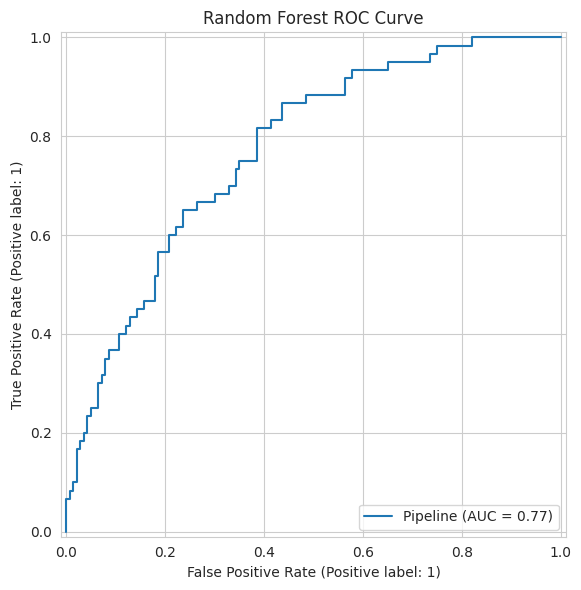

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score
from sklearn.metrics import RocCurveDisplay


# --- Final Random Forest Performance ---

# 1. Make predictions on the unseen test set
y_pred_rf = best_rf_model.predict(X_test_selected)
y_proba_rf = best_rf_model.predict_proba(X_test_selected)[:, 1]

# 2. Report final classification metrics
print("--- Final Random Forest Performance on Hold-Out Test Set ---")
print(classification_report(y_test, y_pred_rf, target_names=['Good Credit', 'Bad Credit']))

# 3. Report final AUC and AUPRC
auc_rf = roc_auc_score(y_test, y_proba_rf)
auprc_rf = average_precision_score(y_test, y_proba_rf)
print(f"Final AUC Score: {auc_rf:.4f}")
print(f"Final Precision-Recall AUC (AUPRC): {auprc_rf:.4f}")

# 4. Plot ROC and Precision-Recall Curves
fig, ax = plt.subplots(1, 1, figsize=(8, 6)) # Changed subplot layout to 1, 1
RocCurveDisplay.from_estimator(best_rf_model, X_test_selected, y_test, ax=ax) # Adjusted ax
ax.set_title('Random Forest ROC Curve') # Adjusted title setting
plt.tight_layout()
plt.show()



--- Final Tuned Logistic Regression Performance on Hold-Out Test Set ---
              precision    recall  f1-score   support

 Good Credit       0.89      0.74      0.80       140
  Bad Credit       0.56      0.78      0.65        60

    accuracy                           0.75       200
   macro avg       0.72      0.76      0.73       200
weighted avg       0.79      0.75      0.76       200

Final AUC Score: 0.8054
Final Precision-Recall AUC (AUPRC): 0.6520


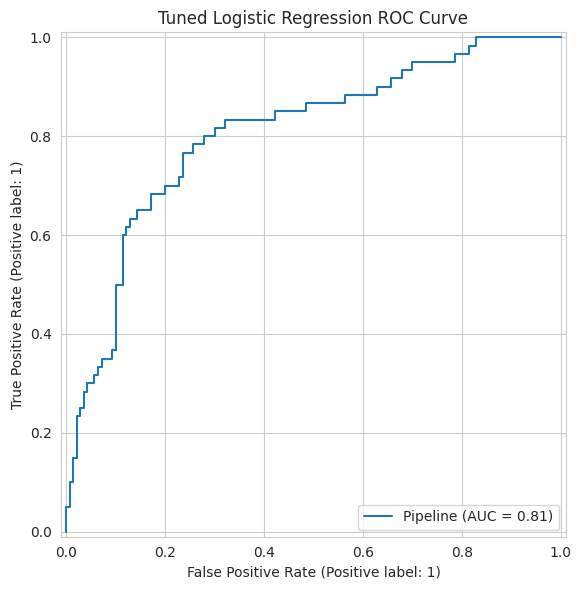

In [ ]:
# --- Final Tuned Logistic Regression Performance ---

# 1. Make predictions on the unseen test set
y_pred_lr_tuned = best_lr_model.predict(X_test_selected)
y_proba_lr_tuned = best_lr_model.predict_proba(X_test_selected)[:, 1]

# 2. Report final classification metrics
print("--- Final Tuned Logistic Regression Performance on Hold-Out Test Set ---")
print(classification_report(y_test, y_pred_lr_tuned, target_names=['Good Credit', 'Bad Credit']))

# 3. Report final AUC and AUPRC
auc_lr_tuned = roc_auc_score(y_test, y_proba_lr_tuned)
auprc_lr_tuned = average_precision_score(y_test, y_proba_lr_tuned)
print(f"Final AUC Score: {auc_lr_tuned:.4f}")
print(f"Final Precision-Recall AUC (AUPRC): {auprc_lr_tuned:.4f}")

# 4. Plot ROC Curve
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
RocCurveDisplay.from_estimator(best_lr_model, X_test_selected, y_test, ax=ax)
ax.set_title('Tuned Logistic Regression ROC Curve')
plt.tight_layout()
plt.show()

--- Final XGBoost Performance on Hold-Out Test Set ---
              precision    recall  f1-score   support

 Good Credit       0.82      0.88      0.85       140
  Bad Credit       0.66      0.55      0.60        60

    accuracy                           0.78       200
   macro avg       0.74      0.71      0.72       200
weighted avg       0.77      0.78      0.77       200

Final AUC Score: 0.7908
Final Precision-Recall AUC (AUPRC): 0.6172


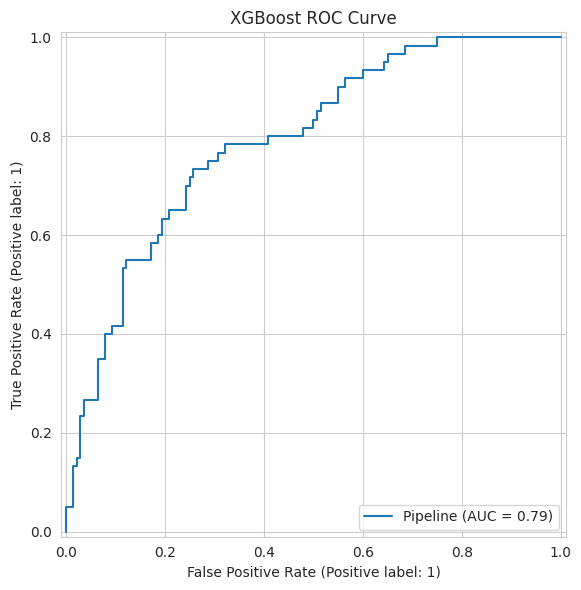

In [ ]:
# --- Final XGBoost Performance ---

# 1. Make predictions on the unseen test set
y_pred_xgb = best_xgb_model.predict(X_test_selected)
y_proba_xgb = best_xgb_model.predict_proba(X_test_selected)[:, 1]

# 2. Report final classification metrics
print("--- Final XGBoost Performance on Hold-Out Test Set ---")
print(classification_report(y_test, y_pred_xgb, target_names=['Good Credit', 'Bad Credit']))

# 3. Report final AUC and AUPRC
auc_xgb = roc_auc_score(y_test, y_proba_xgb)
auprc_xgb = average_precision_score(y_test, y_proba_xgb)
print(f"Final AUC Score: {auc_xgb:.4f}")
print(f"Final Precision-Recall AUC (AUPRC): {auprc_xgb:.4f}")

# 4. Plot ROC Curve
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
RocCurveDisplay.from_estimator(best_xgb_model, X_test_selected, y_test, ax=ax)
ax.set_title('XGBoost ROC Curve')
plt.tight_layout()
plt.show()

--- Final CatBoost Performance on Hold-Out Test Set ---
              precision    recall  f1-score   support

 Good Credit       0.81      0.86      0.83       140
  Bad Credit       0.62      0.53      0.57        60

    accuracy                           0.76       200
   macro avg       0.71      0.70      0.70       200
weighted avg       0.75      0.76      0.75       200

Final AUC Score: 0.8098
Final Precision-Recall AUC (AUPRC): 0.6497


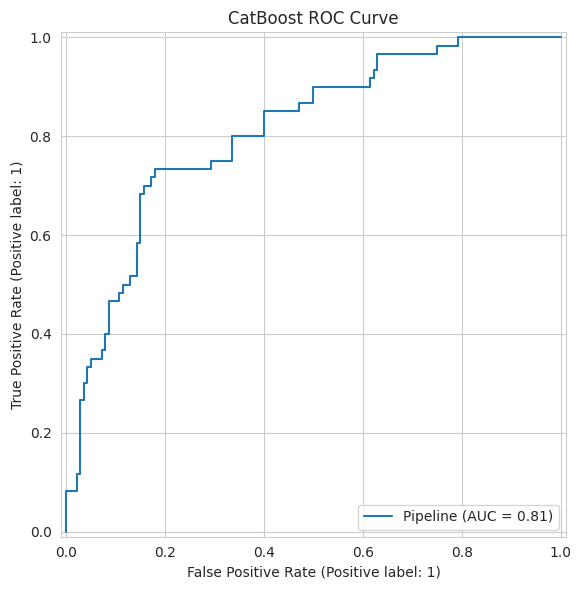

In [ ]:
# --- Final CatBoost Performance ---

# 1. Make predictions on the unseen test set
y_pred_cat = best_cat_model.predict(X_test_selected)
y_proba_cat = best_cat_model.predict_proba(X_test_selected)[:, 1]

# 2. Report final classification metrics
print("--- Final CatBoost Performance on Hold-Out Test Set ---")
print(classification_report(y_test, y_pred_cat, target_names=['Good Credit', 'Bad Credit']))

# 3. Report final AUC and AUPRC
auc_cat = roc_auc_score(y_test, y_proba_cat)
auprc_cat = average_precision_score(y_test, y_proba_cat)
print(f"Final AUC Score: {auc_cat:.4f}")
print(f"Final Precision-Recall AUC (AUPRC): {auprc_cat:.4f}")

# 4. Plot ROC Curve
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
RocCurveDisplay.from_estimator(best_cat_model, X_test_selected, y_test, ax=ax)
ax.set_title('CatBoost ROC Curve')
plt.tight_layout()
plt.show()


## Final Model Evaluation Pipeline ##

--- Training the Targeted Stacking Model (LR + CatBoost) ---
Targeted Stacking model trained successfully.

--- Generating predictions for all models ---

--- Final Combined Model Performance on Test Set ---


,AUC,AUPRC,Recall (Bad Credit),F1-Score (Bad Credit)
Targeted Ensemble (LR+Cat),0.8107,0.6477,0.5167,0.5849
CatBoost,0.8098,0.6497,0.5333,0.5714
Tuned Sklearn LR,0.8054,0.6520,0.7833,0.6528
Statsmodels LR,0.8039,0.6466,0.5167,0.5636
XGBoost,0.7908,0.6172,0.5500,0.6000
Random Forest,0.7719,0.5910,0.5000,0.5217
Tuned MLP,0.7717,0.5867,0.5167,0.5299



--- Visualizing Model Performance (AUC vs. Recall) ---


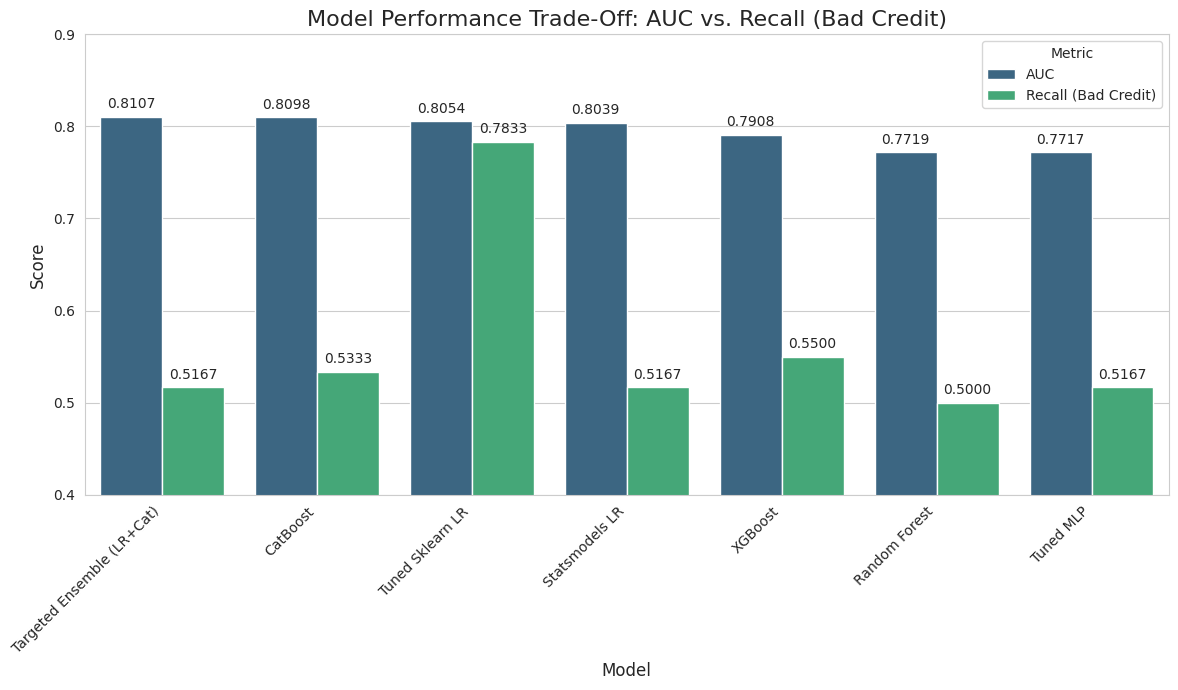

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, average_precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- This block assumes all your previous code has been run ---
# It requires the following objects to be defined:
# - The fitted statsmodels model: result
# - Your tuned model pipelines: best_lr_model, best_rf_model, best_xgb_model, best_cat_model, best_mlp_model
# - Your feature-selected data: X_train_selected, y_train, X_test_selected, y_test, selected_feature_names

print("\n## Final Model Evaluation Pipeline ##")

# --- 1. Create and Train the Targeted Stacking Ensemble ---

print("\n--- Training the Targeted Stacking Model (LR + CatBoost) ---")
# Define the specific base models to combine
targeted_estimators = [
    ('Tuned Sklearn LR', best_lr_model),
    ('CatBoost', best_cat_model)
]
# Define the meta-model
meta_model = LogisticRegression(random_state=42, max_iter=1000)
# Create and train the Stacking Classifier
targeted_stacking_model = StackingClassifier(
    estimators=targeted_estimators,
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1
)
targeted_stacking_model.fit(X_train_selected, y_train)
print("Targeted Stacking model trained successfully.")


# --- 2. Generate Predictions for All Models on the Test Set ---

print("\n--- Generating predictions for all models ---")
# Prepare test data for the statsmodels model
X_test_df = pd.DataFrame(X_test_selected, columns=selected_feature_names)
X_test_const = sm.add_constant(X_test_df)

# Create a dictionary to hold the predictions from every model
all_predictions = {
    'Statsmodels LR': {
        'y_pred': (result.predict(X_test_const) > 0.5).astype(int),
        'y_proba': result.predict(X_test_const)
    },
    'Tuned Sklearn LR': {
        'y_pred': best_lr_model.predict(X_test_selected),
        'y_proba': best_lr_model.predict_proba(X_test_selected)[:, 1]
    },
    'Random Forest': {
        'y_pred': best_rf_model.predict(X_test_selected),
        'y_proba': best_rf_model.predict_proba(X_test_selected)[:, 1]
    },
    'XGBoost': {
        'y_pred': best_xgb_model.predict(X_test_selected),
        'y_proba': best_xgb_model.predict_proba(X_test_selected)[:, 1]
    },
    'CatBoost': {
        'y_pred': best_cat_model.predict(X_test_selected),
        'y_proba': best_cat_model.predict_proba(X_test_selected)[:, 1]
    },
    'Tuned MLP': {
        'y_pred': best_mlp_model.predict(X_test_selected),
        'y_proba': best_mlp_model.predict_proba(X_test_selected)[:, 1]
    },
    'Targeted Ensemble (LR+Cat)': {
        'y_pred': targeted_stacking_model.predict(X_test_selected),
        'y_proba': targeted_stacking_model.predict_proba(X_test_selected)[:, 1]
    }
}


# --- 3. Calculate and Display Final Performance Metrics ---

# Use a dictionary comprehension to calculate all metrics for every model
final_results_data = {
    model_name: {
        'AUC': roc_auc_score(y_test, data['y_proba']),
        'AUPRC': average_precision_score(y_test, data['y_proba']),
        'Recall (Bad Credit)': recall_score(y_test, data['y_pred'], pos_label=1),
        'F1-Score (Bad Credit)': f1_score(y_test, data['y_pred'], pos_label=1)
    } for model_name, data in all_predictions.items()
}

# Convert to a DataFrame and sort for clear presentation
final_results_df = pd.DataFrame(final_results_data).T
# Sort by AUC for a logical order in the plot
sorted_results_df = final_results_df.sort_values(by='AUC', ascending=False)


print("\n--- Final Combined Model Performance on Test Set ---")
display(sorted_results_df.round(4))


# --- 4. Create Grouped Bar Chart for AUC vs. Recall ---

print("\n--- Visualizing Model Performance (AUC vs. Recall) ---")

# Select only the columns we need for the plot
df_plot = sorted_results_df[['AUC', 'Recall (Bad Credit)']]

# "Melt" the DataFrame to a long format, which is required for seaborn's grouped bar plots
df_plot_long = df_plot.reset_index().melt(id_vars='index',
                                          value_vars=['AUC', 'Recall (Bad Credit)'],
                                          var_name='Metric',
                                          value_name='Score')
df_plot_long.rename(columns={'index': 'Model'}, inplace=True)


# Create the plot
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

ax = sns.barplot(data=df_plot_long, x='Model', y='Score', hue='Metric', palette='viridis')

# Add title and labels
plt.title('Model Performance Trade-Off: AUC vs. Recall (Bad Credit)', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate model names for better readability
plt.ylim(0.4, 0.9) # Set y-axis limits to better show the differences
plt.legend(title='Metric', loc='upper right')

# Add the exact score values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.tight_layout()
plt.show()


## SHAP Analysis for the CatBoost Model ##

--- Calculating SHAP values... ---
SHAP values calculated successfully.

--- Generating SHAP Summary Plot ---


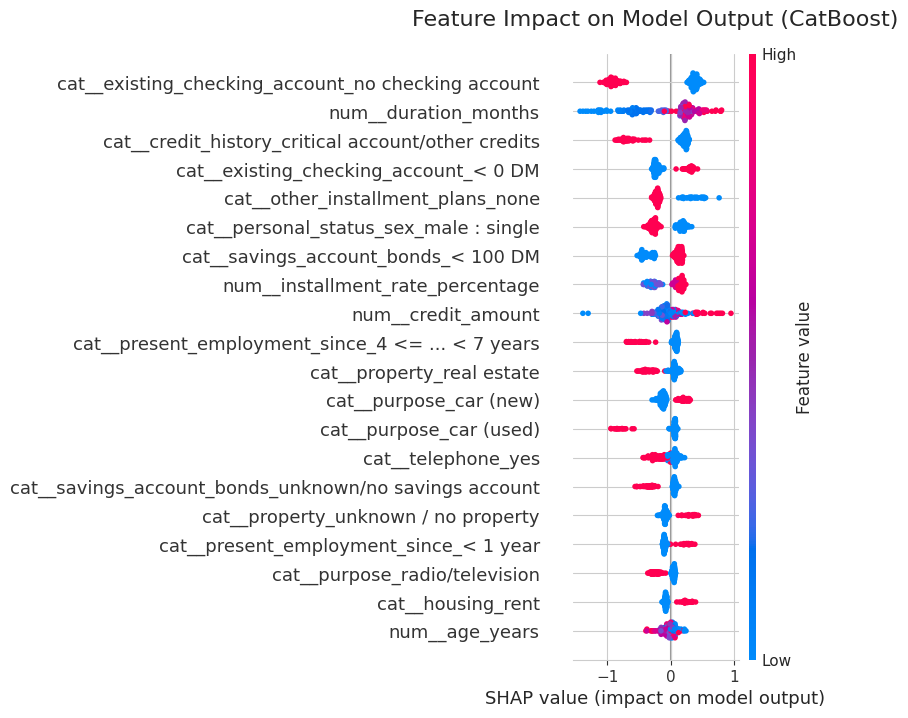

In [ ]:
import shap

print("\n## SHAP Analysis for the CatBoost Model ##")

# 1. Select the model to explain from your tuned estimators
#    We are explaining the CatBoost model, which is the complex part of your ensemble.
#    The .named_steps['classifier'] part accesses the actual CatBoost model inside the SMOTE pipeline.
model_to_explain = best_cat_model.named_steps['classifier']

# 2. Create the SHAP Explainer
#    Since CatBoost is a tree-based model, we use the TreeExplainer.
explainer = shap.TreeExplainer(model_to_explain)

# 3. Create a pandas DataFrame from the test data with correct feature names
#    SHAP uses these names for the plot.
X_test_df = pd.DataFrame(X_test_selected, columns=selected_feature_names)

# 4. Calculate the SHAP values for the test set
print("\n--- Calculating SHAP values... ---")
shap_values = explainer.shap_values(X_test_df)
print("SHAP values calculated successfully.")

# 5. Generate and display the SHAP summary plot
print("\n--- Generating SHAP Summary Plot ---")

# Set the plot title
plt.title("Feature Impact on Model Output (CatBoost)", fontsize=16, pad=20)

# Create the summary plot
# This plot shows the most important features and their impact on the model's predictions.
# - Each dot is a single prediction from the test set.
# - Red dots mean a high feature value, blue dots mean a low feature value.
# - Dots to the right of the center line push the prediction towards "Bad Credit" (1).
# - Dots to the left push the prediction towards "Good Credit" (0).
shap.summary_plot(shap_values, X_test_df, show=False)

# Adjust bottom margin to prevent labels from being cut off
plt.gcf().subplots_adjust(bottom=0.3)

# Display the plot
plt.show()

